In [1]:
# Import dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
# Note: You can only unzip a zipped tuple once before it is removed from the computer's memory. 
# Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

coordinates = list(lat_lngs)
coordinates

[(-20.125393333304572, -13.421140008610422),
 (88.32921529969985, 151.40653810530983),
 (-55.984719339460575, -53.92128940940249),
 (82.419907076279, -6.126558925715074),
 (55.476488060047416, 89.42672948758536),
 (-72.39648143333167, 54.18187244718047),
 (26.103402128758134, 167.69778009062298),
 (-67.18008669049956, -52.1702296422137),
 (14.55207684563483, -15.85062245697847),
 (-3.4524343542550753, -86.39201830778978),
 (13.986424533003344, -40.27288106738166),
 (74.93088660290005, 174.68582679957638),
 (-80.36385302790478, 176.02623143525682),
 (-10.436511471184815, 107.85889375236798),
 (66.67850131476459, -109.28925528606412),
 (4.633216339208587, 143.12033913958737),
 (-82.93477193685686, -24.250742318094893),
 (-67.39673816677409, -133.20845678633296),
 (-30.585638966862646, -158.77902775219314),
 (40.0526286786106, -169.7878938113381),
 (77.6276092075343, -123.6722980014971),
 (-86.17119823198107, -144.22970862284382),
 (-41.13550664520475, 153.64544261023735),
 (-45.180432770

In [4]:
from citipy import citipy
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
     # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

613

In [5]:
import requests
import time
from datetime import datetime
api_key = "26e27adb85e630b46b1b3b676bdb887d"

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities with try and except, they should be within the for loop.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                  "Lat": city_lat,
                  "Lng": city_lng,
                  "Max Temp": city_max_temp,
                  "Humidity": city_humidity,
                  "Cloudiness": city_clouds,
                  "Wind Speed": city_wind,
                  "Country": city_country,
                  "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | chokurdakh
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | chernenko
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | gossas
Processing Record 9 of Set 1 | san cristobal
Processing Record 10 of Set 1 | cayenne
Processing Record 11 of Set 1 | komsomolskiy
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | kawalu
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | vanimo
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | batemans bay
Processing Record 22 of Set 1 | laguna
Processing Record 23 of Set 1 | gigmoto
Processing Record 24 of

Processing Record 36 of Set 4 | jining
Processing Record 37 of Set 4 | cooma
Processing Record 38 of Set 4 | puri
Processing Record 39 of Set 4 | nuuk
Processing Record 40 of Set 4 | tilichiki
Processing Record 41 of Set 4 | tautira
Processing Record 42 of Set 4 | airai
Processing Record 43 of Set 4 | cervo
Processing Record 44 of Set 4 | forio
Processing Record 45 of Set 4 | mar del plata
Processing Record 46 of Set 4 | puerto cabezas
Processing Record 47 of Set 4 | green river
Processing Record 48 of Set 4 | constitucion
Processing Record 49 of Set 4 | san ramon
Processing Record 50 of Set 4 | kuah
Processing Record 1 of Set 5 | dien bien
City not found. Skipping...
Processing Record 2 of Set 5 | kavieng
Processing Record 3 of Set 5 | banda aceh
Processing Record 4 of Set 5 | taunggyi
Processing Record 5 of Set 5 | ugoofaaru
Processing Record 6 of Set 5 | ambo
Processing Record 7 of Set 5 | kupang
Processing Record 8 of Set 5 | kodiak
Processing Record 9 of Set 5 | turukhansk
Process

Processing Record 27 of Set 8 | sorvag
City not found. Skipping...
Processing Record 28 of Set 8 | hasaki
Processing Record 29 of Set 8 | vaitape
Processing Record 30 of Set 8 | stamsund
City not found. Skipping...
Processing Record 31 of Set 8 | siva
Processing Record 32 of Set 8 | touros
Processing Record 33 of Set 8 | taltal
Processing Record 34 of Set 8 | beringovskiy
Processing Record 35 of Set 8 | kununurra
Processing Record 36 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 37 of Set 8 | popondetta
Processing Record 38 of Set 8 | altea
Processing Record 39 of Set 8 | santa marinella
Processing Record 40 of Set 8 | sri aman
Processing Record 41 of Set 8 | farmington
Processing Record 42 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 43 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 44 of Set 8 | kuznechikha
Processing Record 45 of Set 8 | muisne
Processing Record 46 of Set 8 | noceto
Processing Record 47 of Set 8 | adrar
P

Processing Record 14 of Set 12 | palmer
Processing Record 15 of Set 12 | puerto princesa
Processing Record 16 of Set 12 | ponta delgada
Processing Record 17 of Set 12 | burewala
Processing Record 18 of Set 12 | osorio
Processing Record 19 of Set 12 | jasper
Processing Record 20 of Set 12 | baturyn
Processing Record 21 of Set 12 | karratha
Processing Record 22 of Set 12 | harper
Processing Record 23 of Set 12 | ardakan
Processing Record 24 of Set 12 | adre
Processing Record 25 of Set 12 | konstantinovka
Processing Record 26 of Set 12 | ossora
Processing Record 27 of Set 12 | boysun
Processing Record 28 of Set 12 | cortez
Processing Record 29 of Set 12 | atessa
Processing Record 30 of Set 12 | sarakhs
Processing Record 31 of Set 12 | ismailia
Processing Record 32 of Set 12 | dorado
Processing Record 33 of Set 12 | virginia beach
Processing Record 34 of Set 12 | veraval
Processing Record 35 of Set 12 | nantucket
Processing Record 36 of Set 12 | atar
Processing Record 37 of Set 12 | tacoro

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,35.02,68,99,8.99,US,2022-04-03 21:58:07
1,Chokurdakh,70.6333,147.9167,-14.85,99,77,3.13,RU,2022-04-03 22:02:16
2,Ushuaia,-54.8000,-68.3000,38.86,87,75,20.71,AR,2022-04-03 22:02:17
3,Chernenko,44.3650,39.3103,46.35,89,100,13.29,RU,2022-04-03 22:02:17
4,East London,-33.0153,27.9116,71.11,88,69,12.50,ZA,2022-04-03 21:55:55
5,Butaritari,3.0707,172.7902,81.46,70,86,14.74,KI,2022-04-03 22:02:18
6,Gossas,14.4912,-16.0642,68.43,57,76,14.41,SN,2022-04-03 22:02:18
7,San Cristobal,7.7669,-72.2250,78.93,56,46,4.36,VE,2022-04-03 22:00:47
8,Cayenne,4.9333,-52.3333,80.10,1,100,5.75,GF,2022-04-03 21:54:37
9,Komsomolskiy,40.4272,71.7189,60.17,40,100,3.85,UZ,2022-04-03 22:02:18


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-04-03 21:58:07,42.0970,-79.2353,35.02,68,99,8.99
1,Chokurdakh,RU,2022-04-03 22:02:16,70.6333,147.9167,-14.85,99,77,3.13
2,Ushuaia,AR,2022-04-03 22:02:17,-54.8000,-68.3000,38.86,87,75,20.71
3,Chernenko,RU,2022-04-03 22:02:17,44.3650,39.3103,46.35,89,100,13.29
4,East London,ZA,2022-04-03 21:55:55,-33.0153,27.9116,71.11,88,69,12.50
...,...,...,...,...,...,...,...,...,...
555,Ambon,ID,2022-04-03 22:17:11,-3.6954,128.1814,80.74,83,40,5.75
556,Codrington,AU,2022-04-03 22:17:12,-38.2667,141.9667,59.32,80,98,3.89
557,Havelock,US,2022-04-03 22:17:12,34.8791,-76.9013,73.38,26,0,13.80
558,Cairns,AU,2022-04-03 22:14:14,-16.9167,145.7667,81.07,92,75,1.14


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# # Export the city_data into csv. 
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [12]:
# Import the time module.
import time

# Get today's date in seconds.
today = time.time()
today

1649024233.5018308

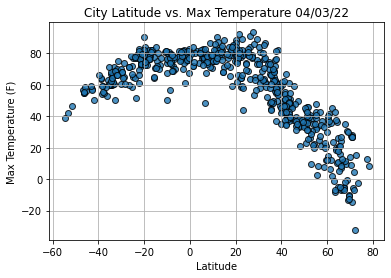

In [13]:
# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           max_temps,
           edgecolor="k", lw=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

plt.show()

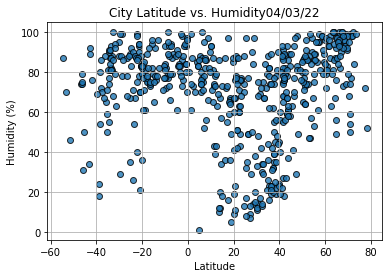

In [14]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
           humidity,
           edgecolor="k", lw=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties. 

plt.title(f"City Latitude vs. Humidity" + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig2.png")

plt.show()

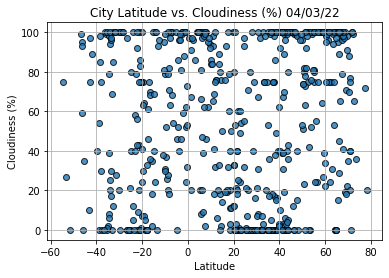

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="k", lw=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig3.png")

plt.show()


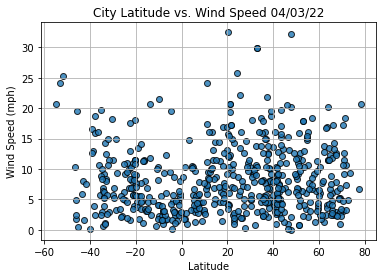

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="k", lw=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("weather_data/Fig4.png")

plt.show()

In [17]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [18]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

# Perform linear regression.
(slope, intercept, r_value, p_value, st_err) = linregress(lats, temps)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [19]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

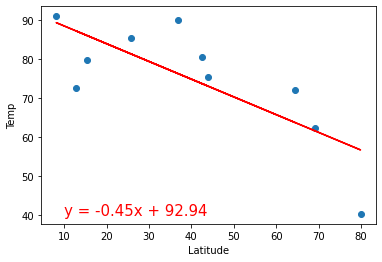

In [20]:
# Import Matplotlib.
import matplotlib.pyplot as plt

# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

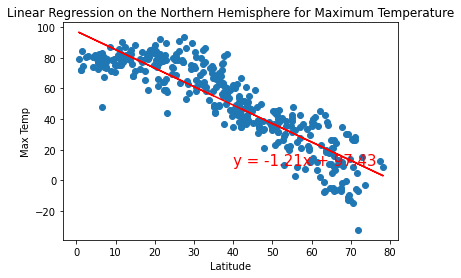

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp', (40, 10))

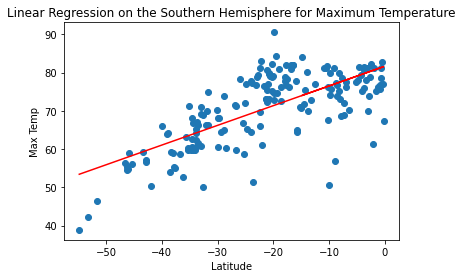

In [24]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for Maximum Temperature", 
                       "Max Temp",(-50,10))

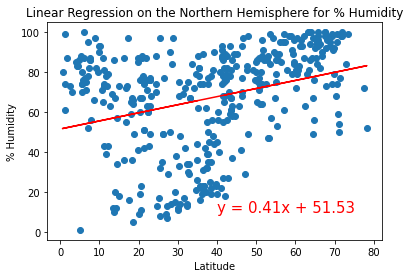

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for % Humidity",
                      "% Humidity", (40, 10))

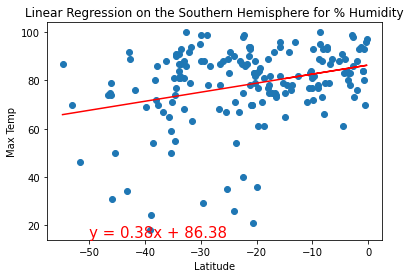

In [26]:
# Linear regression on the Southern Hemisphere humidity.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for % Humidity", 
                       "Max Temp",(-50,15))

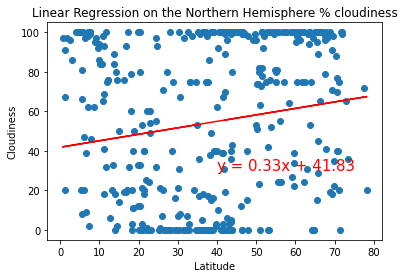

In [27]:
# Cloudiness of Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere % cloudiness",
                      "Cloudiness", (40, 30))

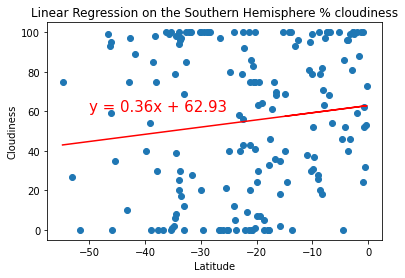

In [28]:
# Cloudiness of Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere % cloudiness",
                      "Cloudiness", (-50, 60))

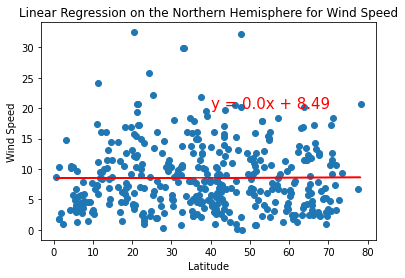

In [29]:
# Linear regression on the Northern Hemisphere wind speed.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for Wind Speed",
                       "Wind Speed", (40, 20))

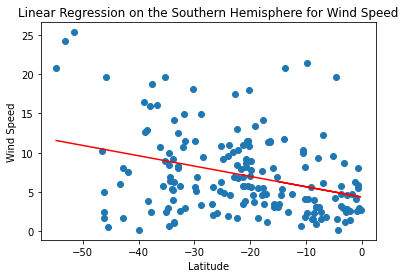

In [30]:
# Southern Hemisphere wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for Wind Speed",
                       "Wind Speed", (-50, 35))